# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

# [作業目標]
- 試著模仿範例寫法, 在鐵達尼生存預測中, 觀察均值編碼的效果

# [作業重點]
- 仿造範例, 完成標籤編碼與均值編碼搭配邏輯斯迴歸的預測
- 觀察標籤編碼與均值編碼在特徵數量 / 邏輯斯迴歸分數 / 邏輯斯迴歸時間上, 分別有什麼影響 (In[3], Out[3], In[4], Out[4]) 

# 作業1
* 請仿照範例，將鐵達尼範例中的類別型特徵改用均值編碼實作一次

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy, time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

data_path = 'data/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#只取類別值 (object) 型欄位, 存於 object_features 中
object_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'object':
        object_features.append(feature)
print(f'{len(object_features)} Numeric Features : {object_features}\n')

# 只留類別型欄位
df = df[object_features]
df = df.fillna('None')
train_num = train_Y.shape[0]
df.head()

5 Numeric Features : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']



,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,None,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,None,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,None,S


# 作業2
* 觀察鐵達尼生存預測中，均值編碼與標籤編碼兩者比較，哪一個效果比較好? 可能的原因是什麼?
* Sex and Embarked 與 y有關聯

In [3]:
# 對照組 : 標籤編碼 + 邏輯斯迴歸
df_temp = pd.DataFrame()
for c in df.columns:
    df_temp[c] = LabelEncoder().fit_transform(df[c])

train_X = df_temp[:train_num] 
estimator = LogisticRegression()
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')
print(f'time : {time.time() - start} sec')

shape : (891, 5)
score : 0.780004837244799
time : 0.11688780784606934 sec


C:\Users\s84120703\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\s84120703\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\s84120703\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\s84120703\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\s84120703\AppData\Local\Continuum\anaconda3\lib\site-pa

In [30]:
df[:train_num].nunique()

Sex           2
Cabin       148
Embarked      4
dtype: int64

In [34]:
data = pd.concat([df[:train_num], train_Y], axis=1)
data.head()
#df.drop(['Name','Ticket'], axis=1, inplace=True)
#data.drop(['Name','Ticket'], axis=1, inplace=True)

,Sex,Cabin,Embarked,Survived
0,male,None,S,0
1,female,C85,C,1
2,female,None,S,1
3,female,C123,S,1
4,male,None,S,0


In [33]:
# 均值編碼 + 邏輯斯迴歸
for c in df.columns:
    print(c)
    mean_df = data.groupby([c])['Survived'].mean().reset_index()
    mean_df.columns = [c, f'{c}_mean']
    data = pd.merge(data, mean_df, on=c , how='left')
    data = data.drop([c], axis=1)
    
data = data.drop(['Survived'] , axis=1)
estimator = LogisticRegression()
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, data, train_Y, cv=5).mean()}')
print(f'time : {time.time() - start} sec')

Sex
Cabin
Embarked
shape : (891, 5)
score : 0.8350366889413987
time : 0.020941972732543945 sec


C:\Users\s84120703\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\s84120703\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\s84120703\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\s84120703\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\s84120703\AppData\Local\Continuum\anaconda3\lib\site-pa

In [36]:
df_draw = pd.concat([df[:train_num], train_Y], axis=1)

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline

C:\Users\s84120703\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


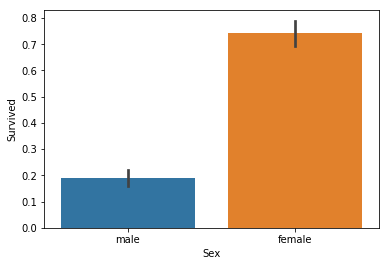

In [44]:
sns.barplot(x="Sex", y="Survived", data=df_draw)


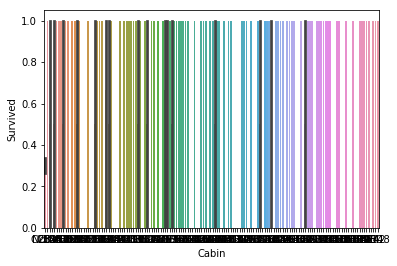

In [45]:
sns.barplot(x="Cabin", y="Survived", data=df_draw)

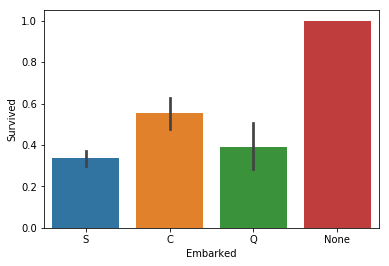

In [46]:
sns.barplot(x="Embarked", y="Survived", data=df_draw)

In [48]:
data['Embarked'].value_counts()

S       644
C       168
Q        77
None      2
Name: Embarked, dtype: int64